In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras

In [30]:
df=pd.read_csv('cifar_train.csv')

In [31]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [32]:
y=df['label']
x=df.drop(labels = ["label"], axis = 1)

In [33]:
x = x.astype('float')/255.

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [35]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [36]:
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

In [37]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
1094/1094 [==============================] - 8s 6ms/step - loss: 2.1612 - accuracy: 0.1861 - val_loss: 2.0190 - val_accuracy: 0.2585
Epoch 2/20
1094/1094 [==============================] - 7s 6ms/step - loss: 2.0852 - accuracy: 0.2081 - val_loss: 1.9817 - val_accuracy: 0.2655
Epoch 3/20
1094/1094 [==============================] - 8s 7ms/step - loss: 2.0595 - accuracy: 0.2146 - val_loss: 1.9644 - val_accuracy: 0.2538
Epoch 4/20
1094/1094 [==============================] - 9s 8ms/step - loss: 2.0324 - accuracy: 0.2200 - val_loss: 1.9421 - val_accuracy: 0.2743
Epoch 5/20
1094/1094 [==============================] - 8s 7ms/step - loss: 2.0243 - accuracy: 0.2249 - val_loss: 1.9149 - val_accuracy: 0.2729
Epoch 6/20
1094/1094 [==============================] - 7s 7ms/step - loss: 2.0216 - accuracy: 0.2218 - val_loss: 1.9110 - val_accuracy: 0.2903
Epoch 7/20
1094/1094 [==============================] - 7s 6ms/step - loss: 2.0191 - accuracy: 0.2239 - val_loss: 1.9544 - val_accuracy:

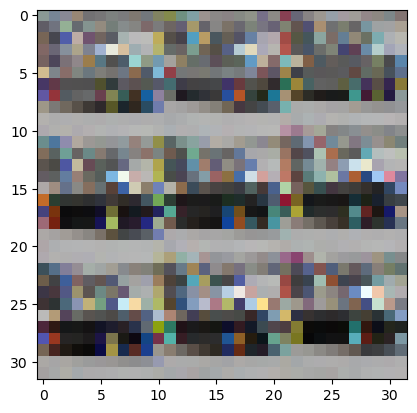

469/469 [==============================] - 1s 2ms/step


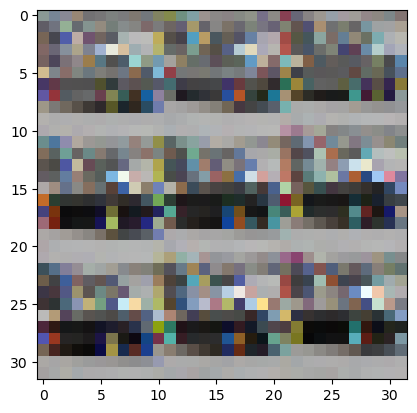

In [39]:
import random
import matplotlib.pyplot as plt
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

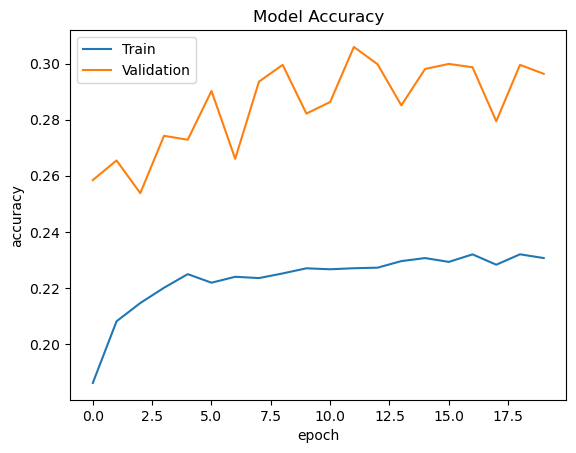

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = "upper left")
plt.show()

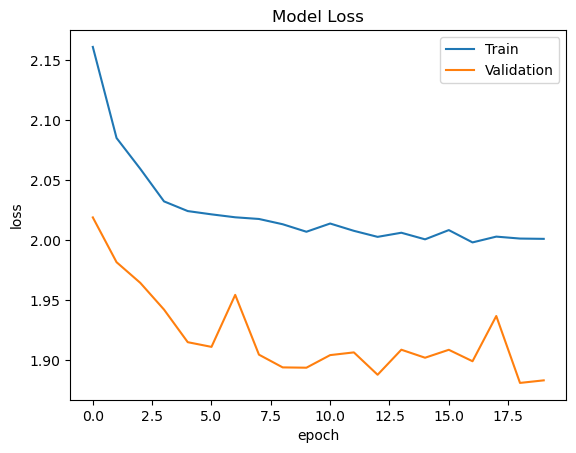

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = "upper right")
plt.show()